In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

## Load data

data source: http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html

In [2]:

dataset = scipy.io.loadmat('../data/Yale_64x64.mat')

H, W = 64, 64
imgs = dataset['fea']
X = imgs.transpose().astype(np.float64)
# X = (X - np.min(X) ) / (np.max(X) - np.min(X))
print( 'the shape of imgs [D x N]:', X.shape )
D = X.shape[0]
N = X.shape[1]
# X: [D x N]

the shape of imgs [D x N]: (4096, 165)


In [3]:
def show_img(vec):
    vec_n = (vec - vec.min() ) / (vec.max() - vec.min())
    plt.imshow( vec_n.reshape([H, W], order='F'))
    plt.show()

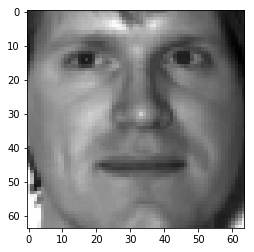

In [4]:
# (optional) to see the image
show_img( X[:,0])

# Example 2.7: PCA for modeling face images under varying illuminations

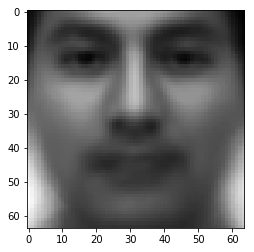

In [5]:
d = 2
# compute mean face
mu = np.mean(X, 1)
show_img(mu)

In [7]:
Xn.shape

(4096, 165)

In [6]:
# normalize data matrix
Xn = np.transpose(X.transpose() - mu)


# PCA
[U, S, V] = np.linalg.svd(Xn, False)

U = U[:, 0:d]
Y = np.dot(U.transpose(), Xn)

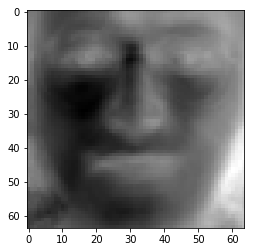

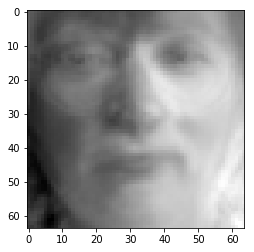

In [288]:
# draw eigenfaces
for i in range(d):
    show_img(U[:,i])

## Fig 2.4(a) Variation along the first and second eiganface

[ -1.85213276e+04  -1.23475517e+04  -6.17377585e+03   3.63797881e-12
   6.17377585e+03   1.23475517e+04]


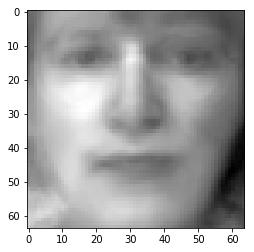

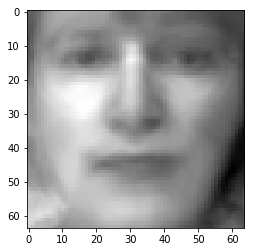

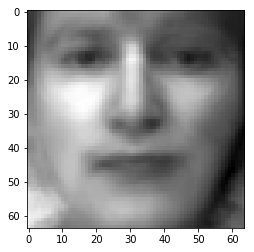

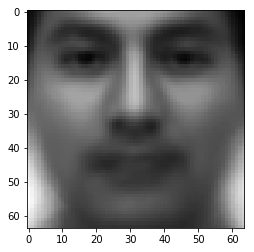

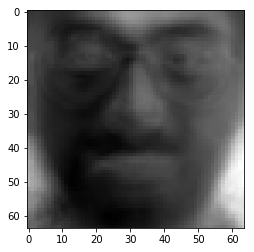

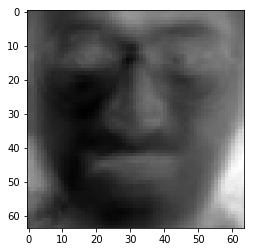

In [289]:
sigmas = np.arange(-S[0], S[0], S[0]/3.)
print(sigmas)
for sig in sigmas:
    show_img(mu + sig * U[:,0])

[-14634.59714461  -9756.39809641  -4878.1990482       0.           4878.1990482
   9756.39809641]


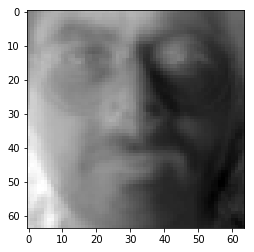

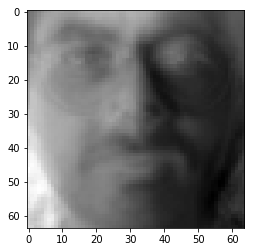

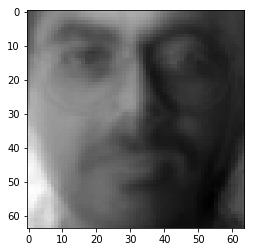

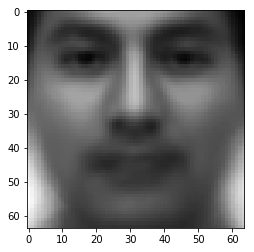

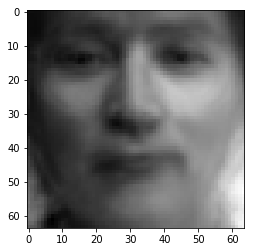

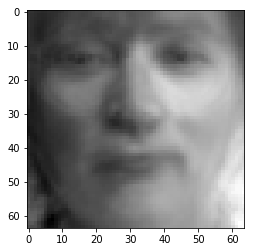

In [290]:
sigmas = np.arange(-S[1], S[1], S[1]/3.)
print(sigmas)
for sig in sigmas:
    show_img(mu + sig * U[:,1])

# Example 2.11: Model selection for Face Images

In [322]:
[U, S, V] = np.linalg.svd(X, False)
s_squared_cum = np.flip(np.cumsum(np.flip(S, 0)**2), 0)
s_squared_ratio = s_squared_cum / s_squared_cum[0]

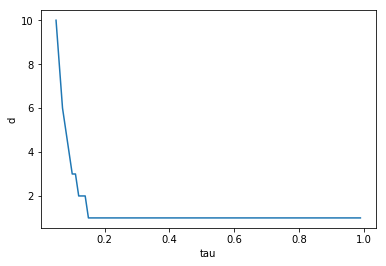

In [326]:
tau = np.arange(0.05, 0.999, 0.01)
# tau = np.arange(0.81, 0.9999, 0.001)
d_modelsel = np.zeros(len(tau))
for i in range(len(tau)):
    idx = np.where(s_squared_ratio < tau[i])[0]
    if len(idx) > 0:
        d_modelsel[i] = idx[0]
    
plt.plot(tau, d_modelsel)
plt.xlabel('tau')
plt.ylabel('d')